# Sentiment Analysis

## Overview
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> Sentiment analysis is a NLP process that aims to classify language data with respect to the underlying attitudes, emotions or sentiment (Gautam & Yadav, 2014; Neethu, 2013; Pozzi et al., 2017). A statement can be classified along a continuum from positive to negative sentiment (Gautam & Yadav, 2014). These data can then be used to evaluate opinions towards any number of topics (Pozzi et al., 2017). Sentiment analysis can be applied to individuals, but it is particularly useful for evaluating public sentiment on a given topic. Social media provides an ideal source of sentiment data (Pozzi et al., 2017), and the results can inform decision-making in any number of situations.

<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> The VADER sentiment analysis tool, in the NLTK package, provides a positive or negative polarity to language data (Beri, 2020). It can be applied directly to unlabelled text and can also evaluate intensity of emotion. The sentiment score is the sum of the intensity of each word in a text (Beri, 2020).

## Rationale
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> The rationale for undertaking a sentiment analysis is as follows: If there is no discernible difference between the language used to discuss women and men in STEM, then it stands to reason that the general sentiment towards women and men in STEM would be similar. If this is the case, then this would confirm the source of the bias as being due to underrepresentation of women in STEM, rather than some inherent language bias.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
import pickle
import seaborn as sns
from textblob import TextBlob

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

In [2]:
# Read the dataset
df = pd.read_csv('tweets_df.csv')

In [ ]:
sid = SentimentIntensityAnalyzer()
semtiment_polarity = df.apply(lambda r: sid.polarity_scores(r.Text), axis=1)

# turn the result into a data frame and add as columns to the original data
sentiment_df = pd.DataFrame(list(semtiment_polarity))
Tweet_sentiment = df.join(sentiment_df)

# assign 'pos, neg, neutral' based on compund value
def sentiment (row):
    if row['compound'] >= 0.05 :
        return 'positive'
    elif row['compound'] <= -0.05 :
        return 'negative'
    else :
        return 'neutral'
    
Tweet_sentiment['sentiment'] = Tweet_sentiment.apply (lambda row: sentiment(row), axis=1)

Tweet_sentiment.head()


## Data Pre-Processing
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> There was limited pre-processing involved prior to sentiment analysis, because VADER can be used on raw text.


## Preliminary assessment of Task Performance
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> As expected, the general  sentiment towards men and women does not vary significantly (Figure 7). The sentiment towards women and men in STEM follow similar trends. Figure 8 shows that Tweets about women are identified as being slightly more positive. These findings are important, because they confirm that gender bias may not always relate to language, as might have been expected.

Figure 8: STEM tweets about women and men have similar polarities


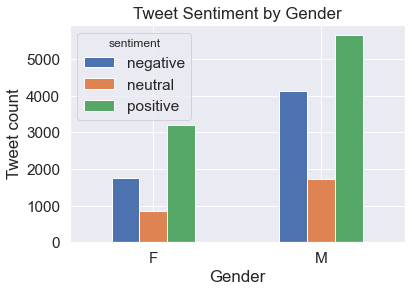

In [22]:
sentiment = Tweet_sentiment.groupby(['Gender', 'sentiment']).sentiment.count().unstack()
sentiment.plot(kind='bar')
plt.title('Tweet Sentiment by Gender')
plt.xlabel('Gender')
plt.ylabel('Tweet count')
plt.xticks(rotation = 0)

print("""Figure 8: STEM tweets about women and men have similar polarities""")


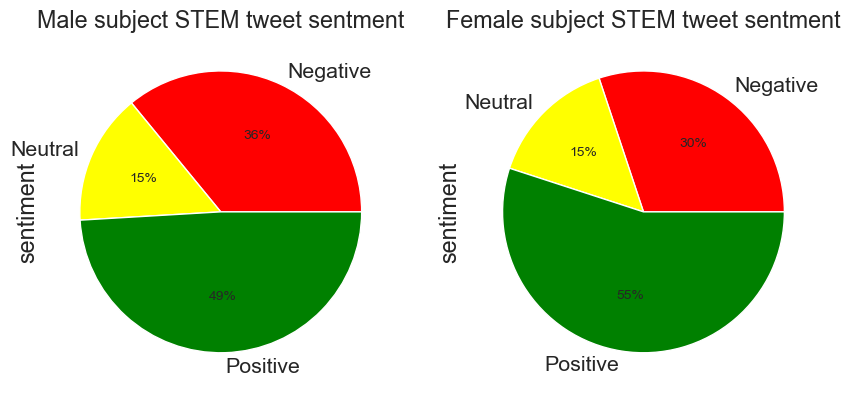

Figure 9: Tweets about women in STEM are slightly more positive than Tweets about men.


In [24]:
df_M = Tweet_sentiment.loc[df['Gender']== "M"]
df_F = Tweet_sentiment.loc[df['Gender']=="F"]

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

labels = ['Negative', 'Neutral', 'Positive']

figure(figsize=(10, 10), dpi=100)

                        
plt.subplot(1, 2, 1)
df_M.groupby(['Gender', 'sentiment']).sentiment.count().plot(kind='pie', autopct='%1.0f%%', labels=labels, colors=["red", "yellow", "green"])
matplotlib.pyplot.title(label="Male subject STEM tweet sentment", fontdict=None, loc='center', pad=None)

plt.subplot(1, 2, 2)
df_F.groupby(['Gender', 'sentiment']).sentiment.count().plot(kind='pie', autopct='%1.0f%%', labels=labels, colors=["red", "yellow", "green"])
matplotlib.pyplot.title(label="Female subject STEM tweet sentment", fontdict=None, loc='center', pad=None)

plt.show()

print("Figure 9: Tweets about women in STEM are slightly more positive than Tweets about men.")

## Final remarks: Identifying the source of bias in NLP.
<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> This analysis showed that, within STEM-related topics, the language used to discuss men and women in STEM is not significantly different (this result may not be universal; a dataset containing Tweets about engineering and childcare may yield different results). The sentiment analysis supports these findings.

<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> While sentiment towards women in STEM is positive, they are still significantly underrepresented in the data and in real life (Robnett, 2016). The bias towards classifying STEM topics as relating to men has implications for NLP tasks,  because this bias is learned and amplified by machine learning algorithms (Sun et al., 2019). perpetuating potentially damaging (not to mention old fashioned) stereotypes regarding women in STEM (i.e. man is to computer programmer as woman is to homemaker) (Wei, 2020). 

<span  style='font-size:20px'><span  style='font-family:"Arial'><span style=''><span  style='line-height:1.5'> Wei (2020) suggests that the most effective way to deal with socially-curated bias is to include more data about those who are underrepresented. The solution to this problem is therefore greater than natural language processing and machine learning alone – it simply requires more women to be involved in STEM. Paradoxically, machine learning algorithms may hamper this ideal by amplifying the already acute gender imbalance. It is hoped that this research on identifying the source of bias might contribute to addressing the broader issue within NLP.
